In [1]:
# import necessary libraries
import pickle
import json
import random
import os.path

from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [2]:
import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\94773\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# tokenizer object loaded to map texts into sequences
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [4]:
classes = ["neutral", "happy", "sad", "love", "anger"]

# load trained model
model = load_model("BESTCNNWeightsNLTP.h5")

In [5]:
to_test = "so happy"

In [6]:
stop = stopwords.words('english')

to_test = to_test.replace('[^\w\s]',' ')

to_test = ' '.join([word for word in to_test.split() if word not in stop])

to_test = " ".join([Word(word).lemmatize() for word in to_test.split()])

In [7]:
print(to_test)

happy


In [8]:
to_test = [to_test]

In [9]:
MAX_SEQUENCE_LENGTH = 30 # max length of text (words) including padding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

sequences_test = tokenizer.texts_to_sequences(to_test)
data_int_t = pad_sequences(sequences_test, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH-5))
data_test = pad_sequences(data_int_t, padding='post', maxlen=(MAX_SEQUENCE_LENGTH))


In [ ]:
y_prob = model.predict(data_test)

In [16]:
pred_scores = y_prob[0]

In [20]:
pred_scores

array([0.34639525, 0.40660602, 0.0880124 , 0.15566762, 0.00331875],
      dtype=float32)

In [19]:
pred_scores[2]

0.088012405

In [11]:
for n, prediction in enumerate(y_prob):
        pred_index = y_prob.argmax(axis=-1)[n]

In [12]:
pred_index

1

In [5]:
#Testing the model on 50, handpicked messages

In [6]:
classes = ["neutral", "happy", "sad", "love", "anger"]

# load trained model
model = load_model("BESTCNNWeightsNLTP.h5")

In [7]:
import pandas as pd

df = pd.read_csv("Handpicked.csv")

In [8]:
df.head()

,Text,Emotion,EmotionSVMLOGREG,EmotionsCNN
0,"I don't feel like doing anything today, everyt...",sad,4,2
1,I just found out my grandmother passed away an...,sad,4,2
2,"I feel so alone and isolated, like no one unde...",sad,4,2
3,"I can't believe I lost my job, how am I going ...",sad,4,2
4,"I miss my ex so much, it's hard to move on.",sad,4,2


In [9]:
actual_emotion = df['EmotionsCNN']

In [17]:
to_test = df['Text']

In [20]:
new_list = []
for i in range(len(to_test)):
    new_list.append(list(to_test[i]))

In [21]:
new_list

[["I don't feel like doing anything today, everything seems pointless."],
 ["I just found out my grandmother passed away and I can't stop crying."],
 ['I feel so alone and isolated, like no one understands me.'],
 ["I can't believe I lost my job, how am I going to pay my bills?"],
 ["I miss my ex so much, it's hard to move on."],
 [" I'm struggling with depression and it's hard to find motivation to get out of bed."],
 ["I feel like I'm constantly disappointing everyone around me."],
 ["I received some bad news from the doctor and I'm feeling really down."],
 ["I'm so heartbroken, my pet just passed away."],
 ["I feel like I'm stuck in a rut and I don't know how to break free."],
 ["I can't believe they did that to me, I'm so furious!"],
 ["I'm sick and tired of dealing with this nonsense, I'm about to snap."],
 ["Why does everything have to be so difficult? I'm getting really angry."],
 ["I feel so disrespected and undervalued, it's making me angry."],
 ["I can't stand how unfair this

In [22]:
MAX_SEQUENCE_LENGTH = 30 # max length of text (words) including padding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [ ]:
sequences_test = tokenizer.texts_to_sequences(to_test)
data_int_t = pad_sequences(sequences_test, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH-5))
data_test = pad_sequences(data_int_t, padding='post', maxlen=(MAX_SEQUENCE_LENGTH))

In [24]:
final_list = []

for i in new_list:
    sequences_test = tokenizer.texts_to_sequences(i)
    data_int_t = pad_sequences(sequences_test, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH-5))
    data_test = pad_sequences(data_int_t, padding='post', maxlen=(MAX_SEQUENCE_LENGTH))
    final_list.append(data_test)

In [31]:
y_prob = model.predict(final_list[0])

In [33]:
len(final_list)

50

In [32]:
y_prob.argmax()

2

In [37]:
pred = []

In [38]:
for i in range(len(final_list)):
    pred.append(model.predict(final_list[i]).argmax())

In [39]:
pred

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 2,
 4,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 1]

In [40]:
from sklearn.metrics import classification_report
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [41]:
print(classification_report(actual_emotion, pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.44      0.40      0.42        10
           2       0.48      1.00      0.65        10
           3       0.62      0.80      0.70        10
           4       1.00      0.60      0.75        10

    accuracy                           0.58        50
   macro avg       0.71      0.58      0.54        50
weighted avg       0.71      0.58      0.54        50



In [42]:
x = confusion_matrix(actual_emotion, pred)

In [43]:
classes = ["Neutral", "Happy", "Sad", "Love", "Anger"]

<AxesSubplot:>

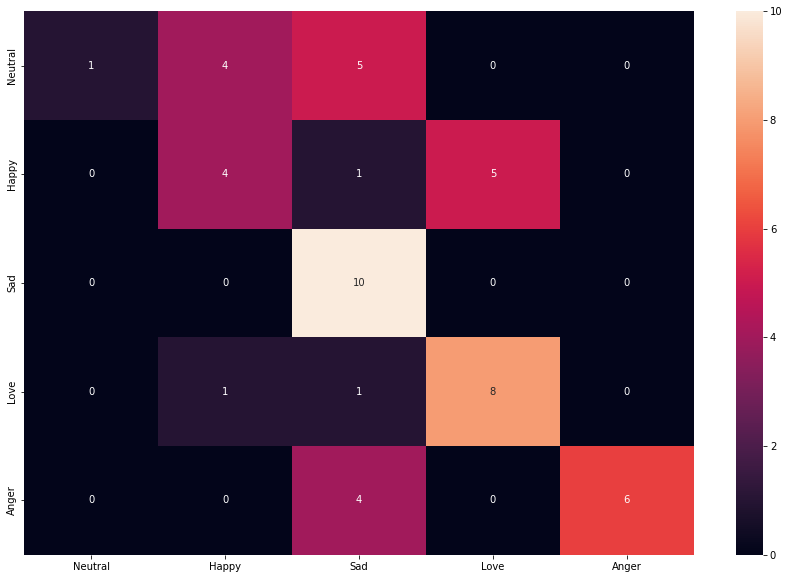

In [44]:
df_cm = pd.DataFrame(x, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (15,10))

sn.heatmap(df_cm, annot=True)

In [1]:
#Testing the model on 8 different messages

In [15]:
import pickle
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from textblob import Word

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\94773\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\94773\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# tokenizer object loaded to map texts into sequences
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [29]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [30]:
model = load_model("CNNWeights.h5")
stop = stopwords.words('english')
MAX_SEQUENCE_LENGTH = 30

In [44]:
message = "im happy to meet my parents soon!"
message = ' '.join([word for word in message.split() if word not in stop])
message = " ".join([Word(word).lemmatize() for word in message.split()])
message = [message]

sequences = tokenizer.texts_to_sequences(message)
pre_padding = pad_sequences(sequences, padding='pre', maxlen=(MAX_SEQUENCE_LENGTH - 5))
post_padding = pad_sequences(pre_padding, padding='post', maxlen=MAX_SEQUENCE_LENGTH)

y_prob = model.predict(post_padding)
print(y_prob[0])

[0.18423396 0.36593562 0.1986597  0.24593389 0.00523675]


In [ ]:
#["neutral", "happy", "sad", "love", "anger"]